In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
boston = load_boston()
# House Prices
y = boston.target
# The other 13 features
x = boston.data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = .2, 
                                                    random_state = 0)

In [93]:
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)

In [28]:
models = [rf, gdbr, abr]

def skorz(model):
    r2_score = np.mean(cross_val_score(model, X_train, y_train, scoring = 'r2'))
    mse_score = - np.mean(cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error'))
    return (r2_score, mse_score)

scores = []
for model in models:
    print(str(model).split('(')[0], skorz(model))

RandomForestRegressor (0.8235396409467558, 15.254443863755304)
GradientBoostingRegressor (0.84880314509467836, 13.094650171732448)
AdaBoostRegressor (0.83045727023547433, 14.63389994472084)


In [91]:
gdbr = GradientBoostingRegressor(learning_rate=1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)
skorz(gdbr)

(0.71065386727543334, 24.342012493682983)

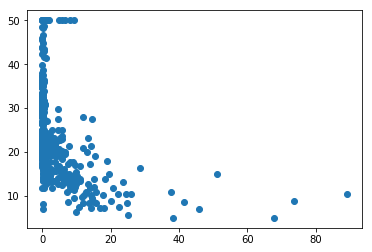

In [39]:
plt.scatter(x[:, 0], y)

In [66]:
def get_staged_predictions(model, X_train, y_train, data):
    model.fit(X_train, y_train)
    mses = []
    r2s = []
    for predictions in model.staged_predict(data[0]):
        r2s.append(r2_score(data[1], predictions))
        mses.append(mean_squared_error(data[1], predictions))
    return mses, r2s

In [120]:
def stage_score_plot(estimator, ax, rate, color, X_train, y_train, X_test, y_test):
    '''
    Parameters: estimator: GradientBoostingRegressor or AdaBoostRegressor
                X_train: 2d numpy array
                y_train: 1d numpy array
                X_test: 2d numpy array
                y_test: 1d numpy array

    Returns: A plot of the number of iterations vs the MSE for the model for
    both the training set and test set.
    '''
    lzt = ['train', 'test']
    lzzzt = ['solid', 'dashed']
    for i, data in enumerate([(X_train, y_train), (X_test, y_test)]):
        mses, _ = get_staged_predictions(estimator, X_train, y_train, data)
        xs = np.arange(len(mses))
        ax.plot(xs, mses, label = '{} - {}'.format(lzt[i], rate), color = color, linestyle = lzzzt[i])

In [121]:
gdbr_small = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)
gdbr_large = GradientBoostingRegressor(learning_rate=1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

/Users/gstudent/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


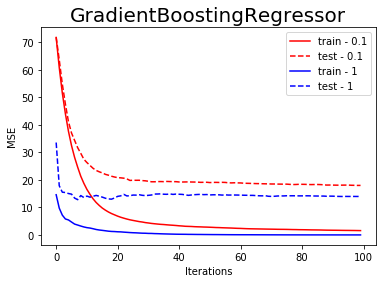

In [122]:
fig, ax = plt.subplots()
stage_score_plot(gdbr_small, ax, 0.1, 'r', X_train, y_train, X_test, y_test)
stage_score_plot(gdbr_large, ax, 1, 'b', X_train, y_train, X_test, y_test)
ax.legend()
ax.set_title(gdbr_small.__class__.__name__, size = 20)
ax.set_xlabel('Iterations')
ax.set_ylabel('MSE')
fig.show()